# Linear Interpolation

We creat an array to store $(x,y)$ coordinates of a function, which in this case is the upper envelope of an animal image. This is stored as a list named Lxy, and the same things as an array named A.


---

🔶 Important: You have to run these cells in the order of their appearance, or first click Runtime (on top of the page) and Run All (or Ctrl+F9)


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Lxy =   ((0,3.5), (0.5,3.75), (1,4.15), (1.5,4.25), (2,3.8), (2.5,3.5), (3,3.05),
        (3.5,2.65), (4,2.35), (4.5,2.2), (5,2.15), (5.5,2.15), (6,2.175), (6.5,2.3),
        (7,2.5), (7.5,2.5), (8,2.2), (8.5,1.85), (9,1.4),
        (9.5,1.0), (10,0.85), (10.5,0.75), (11,0.85), (11.5,0.95), (12,1.25))
A = np.array(Lxy)  # x,y Values of the plot

Mxy =   ((0,3.5), (0.5,2.75), (1,3.0), (1.5,2.25), (2,1.8), (2.5,1.5), (3,1.05),
        (3.5,0.65), (4,0.35), (4.5,0.2), (5,0.15), (5.5,0.15), (6,0.175), (6.5,0.3),
        (7,0.5), (7.5,0.5), (8,0.7), (8.5,0.75), (9,0.85),
        (9.5,0.5), (10,0.60), (10.5,0.55), (11,0.65), (11.5,0.80), (12,1.25))
B = np.array(Mxy)  # x,y Values of the plot

plt.rcParams["figure.figsize"] = (12,5)  # Just Setting Figure Dimensions, not necessary


Let us observe the value as an x,y plot using matplotlib library. The `stem' plot below displays the values by vertical lines. The argument use_line_collection=True can be ignored, if you do not like that. Just delete that part and see.

<StemContainer object of 3 artists>

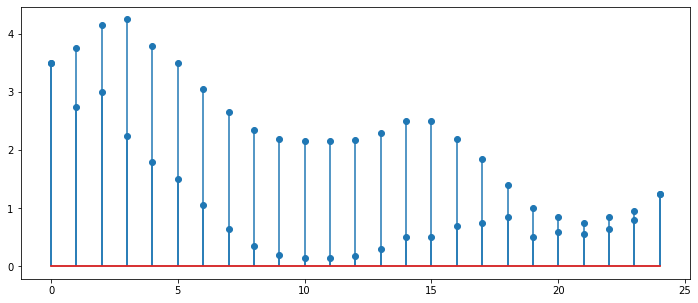

In [ ]:
plt.stem(A[:,1], use_line_collection=True)
plt.stem(B[:,1], use_line_collection=True)

Standard plot functions in Python, matlab etc interpolates successive points by drawing straight lines between them. To avoid edge effects, we typically force the intial conditions and final conditions to zero, i.e. add two samples at both the ends with value zero. This zero-padding is not done in the plot below. However, you are encouraged to edit the code appropriately and add these.

#Homework 1-1: Drawing
Draw a suitable underbelly for the leopard in the above figure. Email the figure as png format to srbpteach@gmail.com

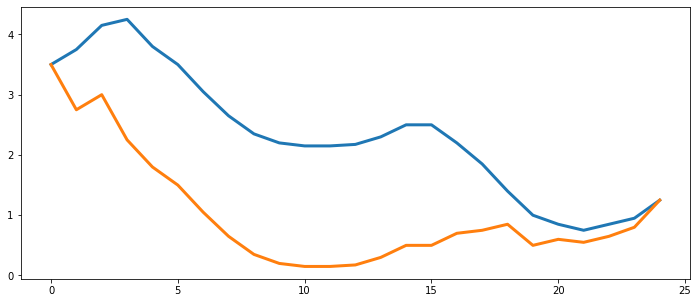

In [ ]:
plt.plot(A[:,1], linewidth=3)
plt.plot(B[:,1], linewidth=3)

#Piecewise Constant Interpolation

 In this every sample is replaced by a horizontal bar centered at the sample value. In case of equispaced samples the length of the bar is same as the sample spacing. It is almost like holding the current value for a fixed interval, then hold the next value, and then hold next to next etc, giving rise to the name *{zero}*-th order hold. This is plotted below. Please play with the options by changing `mid' to `pre'.

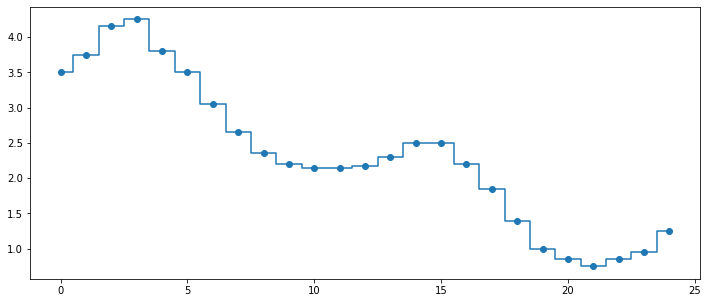

In [ ]:
plt.step(range(0,25),A[:,1],where='mid', marker='o')

#Lagrange Interpolation

 This technique came to fore around the last quarter of eighteenth century. Though published by Lagrange, can be inferred from the work of Euler. If we are given $n+1$ points, we can find a unique polynomial of degree at most $n$ passing through these points. Of course by relaxing the degree one can have several polynomial interpolations, but for reasons apparent, we will play with the minimum degree polynomial. So given the points $t_1, \ldots, t_{n+1}$ on the real lines, and the values of a function at these points $x(t_1), \ldots, x(t_n)$,we are seeking a polynomial $P(t)$ which interpolates. 

Here is a way to break up this problem into smaller subunits. Imagine $x(t_i), i \neq j$ are all zero. Can we find polynomial $P_j(t)$ of degree $n$, which takes the value $x(t_j)$ at $t=t_j$, and zero when $t=t_i$ for all $i: i \neq j$. Lagrange had this elegant choice
$$
P_j(t) = \frac{\prod_{i\neq j}(t - t_i)}{\prod_{i\neq j}(t_j - t_i)} \times x(t_j)
$$
Notice the fraction shown takes the value $1$ when $t=t_j$, thus $P_j(t_j) = x(t_j)$ as required. Since the sum of degree-$n$ polynomials is another polynomial of degree at most $n$, you can evaluate $P_j(t)$ for different $j$ and add such polynomials to get $P(t)$.

The code below has a program to find $P_j(t)$, use that to complete the interpolation in the figure below.

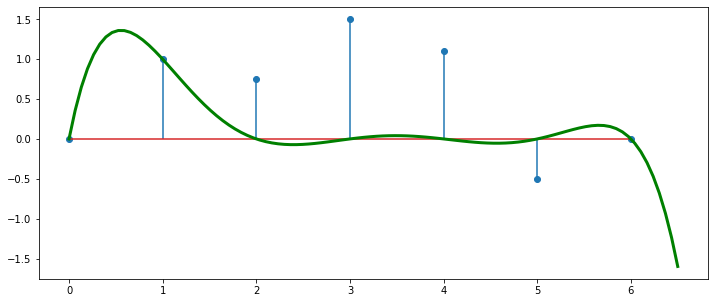

In [ ]:
pt = range(0,7); # taking 5 values + two zeros to the begin and end.
xt = (0, 1, 0.75, 1.5,1.1,-0.5, 0); #values, the first and last lead to zero polynomials.
plt.stem(pt,xt, use_line_collection=True) # just a plot of the values.

def poly(t, j):
  val = 1; 
  for i in range (0,7):
    val*= ((t - pt[i])*(i != j) + 1*(i==j));
    val/= ((pt[j]-pt[i])*(i != j) + 1*(i==j))
  return(xt[j]*val)

t = np.linspace(0,6.5,100); # a set of points
plt.plot(t,poly(t,1),'green', linewidth=3)

#Homework 1-2: polynomial
Construct the full Lagrange interpolation between the points given in the above figure. Email the output in png format to srbpteach@gmail.com

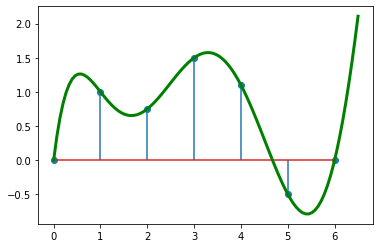

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pt = range(0,7); # taking 5 values + two zeros to the begin and end.
xt = (0, 1, 0.75, 1.5,1.1,-0.5, 0); #values, the first and last lead to zero polynomials.
plt.stem(pt,xt, use_line_collection=True) # just a plot of the values.

def poly(t, j):
  val = 1; 
  for i in range (0,7):
    val*= ((t - pt[i])*(i != j) + 1*(i==j));
    val/= ((pt[j]-pt[i])*(i != j) + 1*(i==j))
  return(xt[j]*val)

t = np.linspace(0,6.5,100); # a set of points
plt.plot(t,poly(t,1)+poly(t,2)+poly(t,3)+poly(t,4)+poly(t,5)+poly(t,6),'green', linewidth=3)